<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/MachineLearningBook/Chapter4/Learning_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


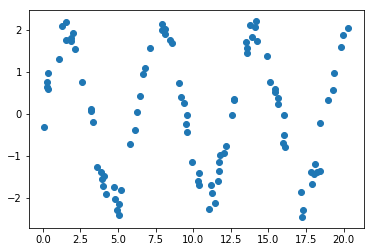

In [11]:
x = 21 * np.random.random((100,1))
y = 2 * np.sin(x) + 0.2*np.random.randn(100,1)

plt.scatter(x,y)

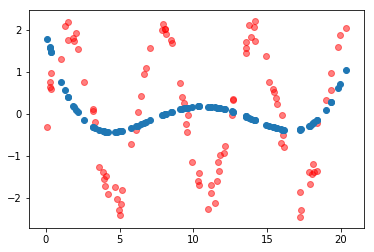

In [13]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=4, include_bias = True)
X = pol.fit_transform(x)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(x,y, alpha=0.5, c='red')
plt.scatter(x,y_pred,)

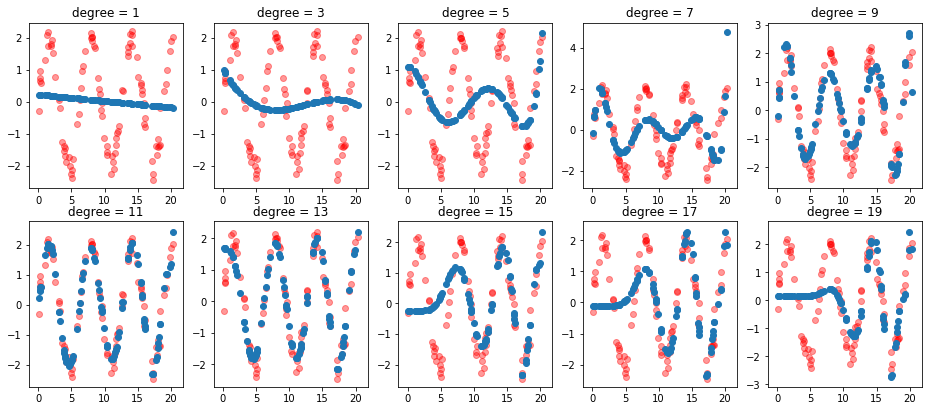

In [28]:
fig = plt.figure(figsize=(16,14))
for i in range(10):
  ax = fig.add_subplot(4,5,i+1,title='degree = {}'.format(2*i+1))
  pol = PolynomialFeatures(degree=2*i+1, include_bias = True)
  X = pol.fit_transform(x)

  model = LinearRegression()
  model.fit(X,y)
  y_pred = model.predict(X)

  ax.scatter(x,y, alpha=0.4, c='red')
  ax.scatter(x,y_pred)

In [0]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
  train_errors, val_errors =[], []
  for m in range (1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_pred = model.predict(X_train[:m])
    y_test_pred = model.predict(X_test[:m])
    train_errors.append(MSE(y_train_pred, y_train[:m]))
    val_errors.append(MSE(y_test_pred, y_test[:m]))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    

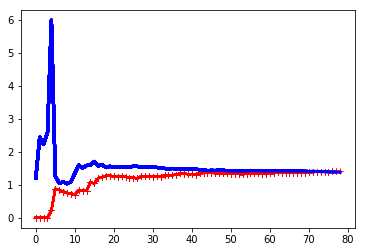

In [49]:
pol = PolynomialFeatures(degree=3, include_bias=True)
X = pol.fit_transform(x)

model = LinearRegression()
plot_learning_curves(model, X, y)



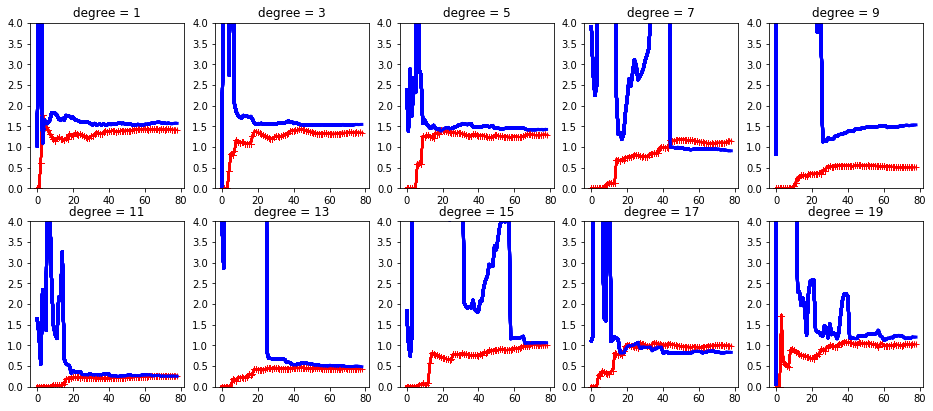

In [52]:
fig = plt.figure(figsize=(16,14))
for i in range(10):
  ax = fig.add_subplot(4,5,i+1,title='degree = {}'.format(2*i+1))
  pol = PolynomialFeatures(degree=2*i+1, include_bias = True)
  X = pol.fit_transform(x)
  ax.set_ylim([0,4])
  model = LinearRegression()
  plot_learning_curves(model, X, y)